In this notebook, I will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

I wil generate a pair of arrays <b>X</b> and <b>y</b> with the values in 
<b>X</b> equally distributed between <b>0</b> and 
<b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
# Create Data 
a = -1
b = 2
x = np.linspace(0, 20)
y = (a * x) + b

In [3]:
print("X: \n ",x,"\n\n","Y: \n ",y)

X: 
  [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ] 

 Y: 
  [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42

#### Plot your data points. 

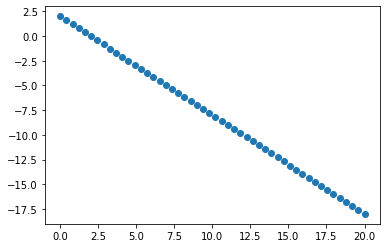

In [4]:
plt.scatter(x,y)

# -----------------------------------------------------------------------------------------------------------

# 1. Adagrad

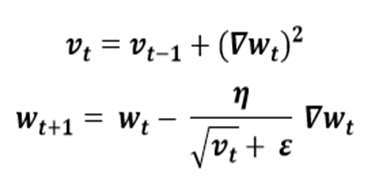

In [5]:
def Adagrad(x, y,Learning_rate, num_iterations):
    # intialize theta_0 , theta_1
    theta_0 = 0
    theta_1 = 0
    
    # initalize exponentially weighted sum
    V_0 = 0
    V_1 = 0
    
    # initalize Momentum parameter 
    #Gamma = 0.1

    # intialize Learning rate
    #Alpha = 0.001
     
    m = len(x)

    threshold = 0.001
    epsilon = 0.001
    
    counter= 0 # to count number of iteration will model take 
    
    THETA_0 =[]
    THETA_1 =[]
    Cost_J = []
    
    Total_predict = []
    
    for i in range(num_iterations):
        # Calc. Y-hat
        predict = theta_0 + (theta_1 * x)
        Total_predict.append(predict)
            
        # calculate error (difference between predict output and target output) 
        error = predict - y

        # Calc. cost function (Loss fun.)
        J = (1/(2*m)) * (np.dot(error,error))
        Cost_J.append(J)
        
        THETA_0.append(theta_0)
        THETA_1.append(theta_1)
        
        print("Iteration :",(i+1),", Cost :",J,"  Theta_0 :",theta_0,"  Theta_1 :",theta_1)        
        
        # Calc. Gredient for temp. parameters
        gred_theta_temp_0 = (1/m) * sum(error)
        gred_theta_temp_1 = (1/m) * (np.dot(error, x))
        
        
        # Calc. the exponentially weighted sum 
        V_0 = V_0 + (gred_theta_temp_0 ** 2) 
        V_1 = V_1 + (gred_theta_temp_1 ** 2) 

        
        # Update Parameters
        theta_0 = theta_0 - ((Learning_rate /np.sqrt(V_0 + epsilon))* gred_theta_temp_0)
        theta_1 = theta_1 - ((Learning_rate /np.sqrt(V_1 + epsilon))* gred_theta_temp_1)
        

        counter += 1
        # check for early stoping
        if abs(Cost_J[i-1] - Cost_J[i]) < threshold and i > 1:
            break
    
    print("\n***************************************************************************************\n")
    print("Model Will take",counter,"iterations to Converge")
    
    return THETA_0, THETA_1 , predict, Cost_J , Total_predict

In [6]:
# Fuction ---> Adagrad(x, y,Learning_rate, num_iterations)
THETA_0_Adagrad, THETA_1_Adagrad , predict_Adagrad, Cost_J_Adagrad , Total_predict_Adagrad = Adagrad(x, y, 100, 100)

Iteration : 1 , Cost : 49.34693877551021   Theta_0 : 0   Theta_1 : 0
Iteration : 2 , Cost : 766248.4392629677   Theta_0 : -99.99921875915516   Theta_1 : -99.99999619907318
Iteration : 3 , Cost : 48.966818384836344   Theta_0 : -0.0019022162607598148   Theta_1 : -0.0031880481500934366
Iteration : 4 , Cost : 0.9610247836462829   Theta_0 : -0.7313708573125436   Theta_1 : -0.7990130776706189
Iteration : 5 , Cost : 0.9164362286544716   Theta_0 : -0.6653027748527739   Theta_1 : -0.7973273195324346
Iteration : 6 , Cost : 0.876633140567105   Theta_0 : -0.6068282258671724   Theta_1 : -0.8018255051234273
Iteration : 7 , Cost : 0.8385589738372318   Theta_0 : -0.5495892152775251   Theta_1 : -0.8061764828489737
Iteration : 8 , Cost : 0.8021384598320864   Theta_0 : -0.49360740231958167   Theta_1 : -0.8104323063685769
Iteration : 9 , Cost : 0.7672997759762666   Theta_0 : -0.43885479728876003   Theta_1 : -0.8145946803321443
Iteration : 10 , Cost : 0.7339742191899177   Theta_0 : -0.3853044126052293   Th

Text(0.5, 1.0, 'Best Curve fit ')

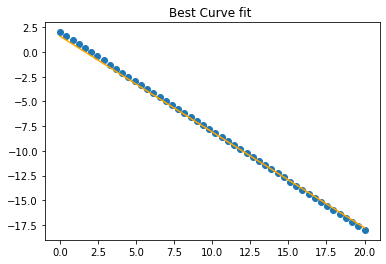

In [7]:
plt.plot(x, predict_Adagrad, 'orange')
plt.scatter(x,y)
plt.title("Best Curve fit ")

In [8]:
# Create Plotting Function
def graph(x,y):
    fig = plt.subplots(figsize=(7,6))
    plt.plot(x, y, marker='o')
    plt.ylabel("Cost")

Text(0.5, 1.0, 'Loss-Theta0')

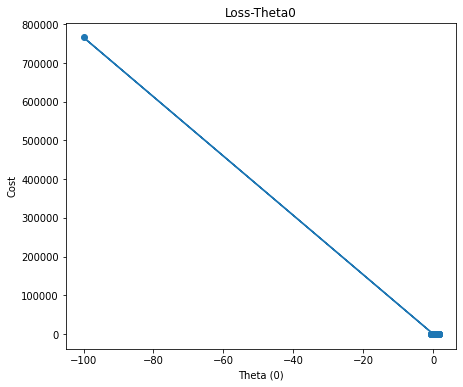

In [9]:
graph(THETA_0_Adagrad, Cost_J_Adagrad)
plt.xlabel("Theta (0)")
plt.title("Loss-Theta0")

Text(0.5, 1.0, 'Loss-Theta1')

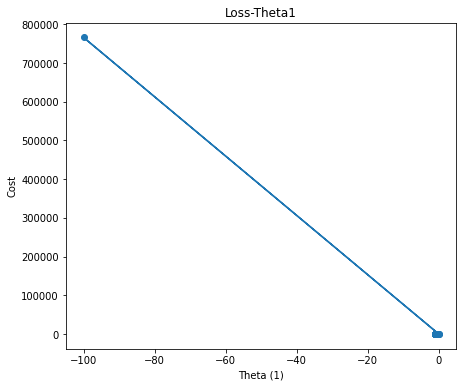

In [10]:
graph(THETA_1_Adagrad, Cost_J_Adagrad)
plt.xlabel("Theta (1)")
plt.title("Loss-Theta1")

# -----------------------------------------------------------------------------------------------------------

# 2. RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

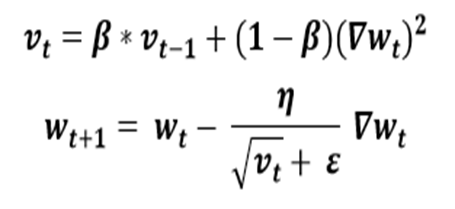

In [11]:
def RMS(x, y,Beta, Learning_rate, num_iterations):
    # intialize theta_0 , theta_1
    theta_0 = 0
    theta_1 = 0
    
    # initalize exponentially weighted sum
    V_0 = 0
    V_1 = 0
    
    # initalize Momentum parameter 
    #Gamma = 0.1

    # intialize Learning rate
    #Alpha = 0.001
     
    m = len(x)

    threshold = 0.001
    epsilon = 0.001
    
    counter= 0 # to count number of iteration will model take 
    
    THETA_0 =[]
    THETA_1 =[]
    Cost_J = []
    
    Total_predict = []
    
    for i in range(num_iterations):
        # Calc. Y-hat
        predict = theta_0 + (theta_1 * x)
        Total_predict.append(predict)
            
        # calculate error (difference between predict output and target output) 
        error = predict - y

        # Calc. cost function (Loss fun.)
        J = (1/(2*m)) * (np.dot(error,error))
        Cost_J.append(J)
        
        THETA_0.append(theta_0)
        THETA_1.append(theta_1)
        
        print("Iteration :",(i+1),", Cost :",J,"  Theta_0 :",theta_0,"  Theta_1 :",theta_1)        
        
        # Calc. Gredient for temp. parameters
        gred_theta_temp_0 = (1/m) * sum(error)
        gred_theta_temp_1 = (1/m) * (np.dot(error, x))
        
        
        # Calc. the exponentially weighted sum 
        V_0 = (Beta*V_0) + ((1-Beta)*(gred_theta_temp_0 ** 2)) 
        V_1 = (Beta*V_1) + ((1-Beta)*(gred_theta_temp_1 ** 2)) 

        
        # Update Parameters
        theta_0 = theta_0 - ((Learning_rate /np.sqrt(V_0 + epsilon))* gred_theta_temp_0)
        theta_1 = theta_1 - ((Learning_rate /np.sqrt(V_1 + epsilon))* gred_theta_temp_1)
        

        counter += 1
        # check for early stoping
        if abs(Cost_J[i-1] - Cost_J[i]) < threshold and i > 1:
            break
    
    print("\n***************************************************************************************\n")
    print("Model Will take",counter,"iterations to Converge")
    
    return THETA_0, THETA_1 , predict, Cost_J , Total_predict

In [12]:
# Funcction ----> RMS(x, y,Beta, Learning_rate, num_iterations)
THETA_0_RMS, THETA_1_RMs , predict_RMS, Cost_J_RMS, Total_predict_RMS = RMS(x, y, 0.8, 0.01, 1000)

Iteration : 1 , Cost : 49.34693877551021   Theta_0 : 0   Theta_1 : 0
Iteration : 2 , Cost : 46.64235098474883   Theta_0 : -0.022359806362120392   Theta_1 : -0.02236067552543349
Iteration : 3 , Cost : 44.70220744031449   Theta_0 : -0.038792414531030744   Theta_1 : -0.03881338689366366
Iteration : 4 , Cost : 43.0819971337168   Theta_0 : -0.05278707014685438   Theta_1 : -0.052835736414093754
Iteration : 5 , Cost : 41.64383378173083   Theta_0 : -0.06542973550388191   Theta_1 : -0.06551093305029332
Iteration : 6 , Cost : 40.32499898129059   Theta_0 : -0.07721594698619222   Theta_1 : -0.07733344730942053
Iteration : 7 , Cost : 39.09127630623866   Theta_0 : -0.088417084397501   Theta_1 : -0.08857413901593109
Iteration : 8 , Cost : 37.92188551686335   Theta_0 : -0.09919871366429169   Theta_1 : -0.09939828372479703
Iteration : 9 , Cost : 36.803288007545696   Theta_0 : -0.10966926721466635   Theta_1 : -0.10991413744733247
Iteration : 10 , Cost : 35.72622059814102   Theta_0 : -0.11990336222241786

Iteration : 119 , Cost : 0.6828664603329065   Theta_0 : -0.30266086838454787   Theta_1 : -0.8289055787319157
Iteration : 120 , Cost : 0.6770385742109776   Theta_0 : -0.2928142710574033   Theta_1 : -0.8296513130009386
Iteration : 121 , Cost : 0.6712385164805477   Theta_0 : -0.282972441749431   Theta_1 : -0.8303952080904529
Iteration : 122 , Cost : 0.6654659082136506   Theta_0 : -0.2731347896360697   Theta_1 : -0.8311364774048957
Iteration : 123 , Cost : 0.6597204239997899   Theta_0 : -0.26330095806591425   Theta_1 : -0.8318814672064715
Iteration : 124 , Cost : 0.6540018986611946   Theta_0 : -0.2534698057871919   Theta_1 : -0.8325878414356902
Iteration : 125 , Cost : 0.6483133094935838   Theta_0 : -0.24364621527277977   Theta_1 : -0.8335888830397419
Iteration : 126 , Cost : 0.6429600325200997   Theta_0 : -0.23378838231453763   Theta_1 : -0.8319347759562272
Iteration : 127 , Cost : 0.6499303496035507   Theta_0 : -0.2242725523455327   Theta_1 : -0.8486329125532872
Iteration : 128 , Cost : 

Iteration : 227 , Cost : 0.20517002272455456   Theta_0 : 0.7422666050251477   Theta_1 : -0.911249024206029
Iteration : 228 , Cost : 0.2022052008079218   Theta_0 : 0.7531425791094226   Theta_1 : -0.9020016965878573
Iteration : 229 , Cost : 0.19905275206016082   Theta_0 : 0.7612956501132612   Theta_1 : -0.9126630304744879
Iteration : 230 , Cost : 0.19613747252322455   Theta_0 : 0.7721825150532416   Theta_1 : -0.9034146465483023
Iteration : 231 , Cost : 0.19303492377345963   Theta_0 : 0.7803051709972075   Theta_1 : -0.9140756498758864
Iteration : 232 , Cost : 0.19016908307861852   Theta_0 : 0.7912031832859683   Theta_1 : -0.9048262158568933
Iteration : 233 , Cost : 0.1871163797813542   Theta_0 : 0.7992944796048265   Theta_1 : -0.9154866964348203
Iteration : 234 , Cost : 0.1842999330555591   Theta_0 : 0.8102038674214916   Theta_1 : -0.9062364002179953
Iteration : 235 , Cost : 0.1812970835318702   Theta_0 : 0.8182628340587438   Theta_1 : -0.9168961699825701
Iteration : 236 , Cost : 0.178530

In [13]:
# Create Plotting Function
def graph(x,y):
    fig = plt.subplots(figsize=(7,6))
    plt.plot(x, y, marker='o')
    plt.ylabel("Cost")

Text(0.5, 0, 'THETA0_RMS ')

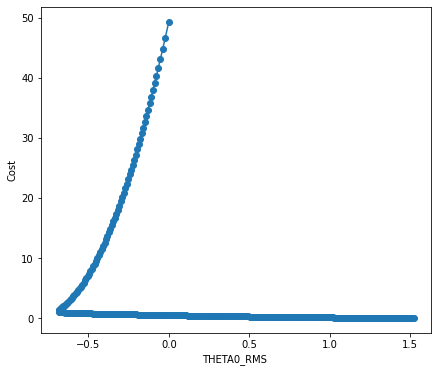

In [14]:
graph(THETA_0_RMS, Cost_J_RMS)
plt.xlabel("THETA0_RMS ")

Text(0.5, 0, 'THETA1_RMS')

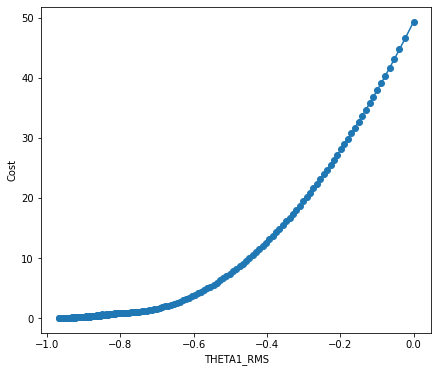

In [15]:
graph(THETA_1_RMs, Cost_J_RMS)
plt.xlabel("THETA1_RMS")

Text(0, 0.5, 'Cost')

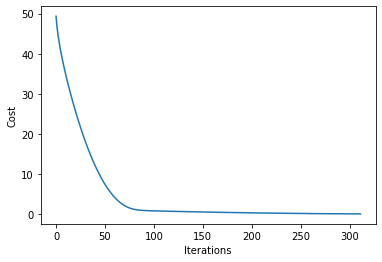

In [16]:
plt.plot(Cost_J_RMS)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [17]:
# to Calc. acuuracy
from sklearn.metrics import r2_score
r2_score(y, predict_RMS)

0.9981771926280234

# -----------------------------------------------------------------------------------------------------------

# 3. Adam

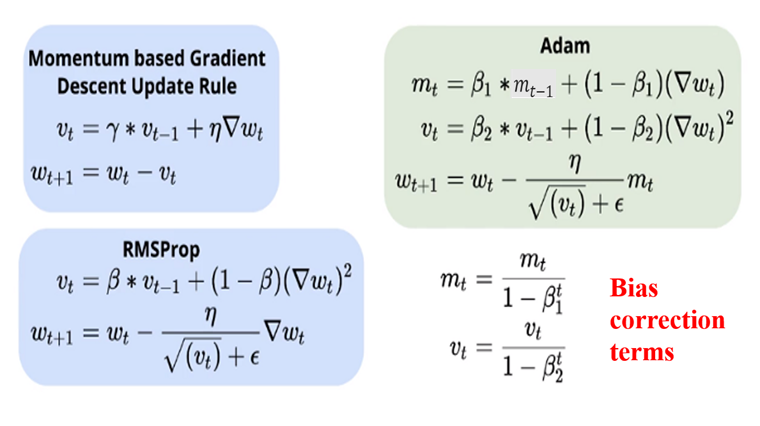

In [18]:
def ADAM(x, y, Gamma, Beta, Learning_rate, num_iterations):
    # intialize theta_0 , theta_1
    theta_0 = 0
    theta_1 = 0
    
    # initalize exponentially weighted sum
    V_0 = 0
    V_1 = 0
    m_0 = 0
    m_1 = 0
    
    # initalize Momentum parameter 
    #Gamma = 0.1

    # intialize Learning rate
    #Alpha = 0.001
     
    m = len(x)

    threshold = 0.001
    epsilon = 0.001
    
    counter= 0 # to count number of iteration will model take 
    
    THETA_0 =[]
    THETA_1 =[]
    Cost_J = []
    
    Total_predict = []
    
    for i in range(num_iterations):
        # Calc. Y-hat
        predict = theta_0 + (theta_1 * x)
        Total_predict.append(predict)
            
        # calculate error (difference between predict output and target output) 
        error = predict - y

        # Calc. cost function (Loss fun.)
        J = (1/(2*m)) * (np.dot(error,error))
        Cost_J.append(J)
        
        THETA_0.append(theta_0)
        THETA_1.append(theta_1)
        
        print("Iteration :",(i+1),", Cost :",J,"  Theta_0 :",theta_0,"  Theta_1 :",theta_1)        
        
        # Calc. Gredient for temp. parameters
        gred_theta_temp_0 = (1/m) * sum(error)
        gred_theta_temp_1 = (1/m) * (np.dot(error, x))
        
        
        # Calc. the exponentially weighted sum RMS
        V_0 = (Beta*V_0) + ((1-Beta)*(gred_theta_temp_0 ** 2)) 
        V_1 = (Beta*V_1) + ((1-Beta)*(gred_theta_temp_1 ** 2)) 

        # Calc. the exponentially weighted sum Momentum
        m_0 = (Gamma * m_0) + ((1-Gamma)*(gred_theta_temp_0)) 
        m_1 = (Gamma * m_1) + ((1-Gamma)*(gred_theta_temp_1)) 
        
        
        # Update Parameters
        theta_0 = theta_0 - ((Learning_rate /np.sqrt(V_0 + epsilon))* m_0)
        theta_1 = theta_1 - ((Learning_rate /np.sqrt(V_1 + epsilon))* m_1)
        

        counter += 1
        # check for early stoping
        if abs(Cost_J[i-1] - Cost_J[i]) < threshold and i > 1:
            break
    
    print("\n***************************************************************************************\n")
    print("Model Will take",counter,"iterations to Converge")
    
    return THETA_0, THETA_1 , predict, Cost_J , Total_predict

In [19]:
# ADAM(x, y, Gamma, Beta, Learning_rate, num_iterations)
THETA_0_ADAM, THETA_1_ADAM, predict_ADAM, Cost_J_ADAM, Total_predict_ADAM = ADAM(x, y, 0.9, 0.9, 0.01, 200)

Iteration : 1 , Cost : 49.34693877551021   Theta_0 : 0   Theta_1 : 0
Iteration : 2 , Cost : 48.959727241785444   Theta_0 : -0.0031620306361739257   Theta_1 : -0.003162276458210397
Iteration : 3 , Cost : 48.42854479295993   Theta_0 : -0.007520739218193134   Theta_1 : -0.0075211658420602946
Iteration : 4 , Cost : 47.79804091115131   Theta_0 : -0.012726306054127062   Theta_1 : -0.012726891150893805
Iteration : 5 , Cost : 47.09283900736788   Theta_0 : -0.018590338773982314   Theta_1 : -0.018591079597849433
Iteration : 6 , Cost : 46.32942435914573   Theta_0 : -0.0249892319458783   Theta_1 : -0.024990141978796912
Iteration : 7 , Cost : 45.519900650589626   Theta_0 : -0.03183374038992297   Theta_1 : -0.0318348500274314
Iteration : 8 , Cost : 44.67364080520821   Theta_0 : -0.039055684674141194   Theta_1 : -0.039057043162883
Iteration : 9 , Cost : 43.79815479963114   Theta_0 : -0.04660101750324338   Theta_1 : -0.046602695315904816
Iteration : 10 , Cost : 42.89960184321857   Theta_0 : -0.0544257

In [20]:
# to Calc. acuuracy
from sklearn.metrics import r2_score
r2_score(y, predict_ADAM)

0.9436337264171912

Text(0, 0.5, 'Cost')

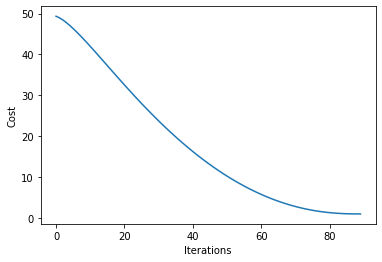

In [21]:
plt.plot(Cost_J_ADAM)
plt.xlabel('Iterations')
plt.ylabel('Cost')

Text(0.5, 0, 'Theta(0)')

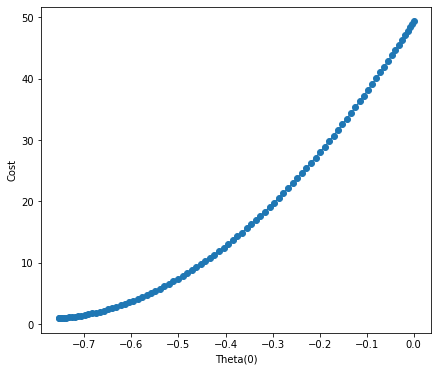

In [22]:
graph(THETA_0_ADAM, Cost_J_ADAM)
plt.xlabel("Theta(0)")


Text(0.5, 0, 'Theta(1)')

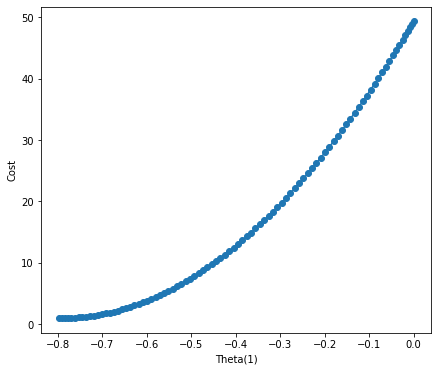

In [23]:
graph(THETA_1_ADAM, Cost_J_ADAM)
plt.xlabel("Theta(1)")
